# Object oriented programming

## Objectives
* Learn how to use objects
* Learn how to make classes

Objects are everywhere in Python. And you can make your own!

Why?

* You can collect data and actions into one package
* You can change the object behavior to be "natural" for your situation
* You can replace parts of functions
* You can template an interface

#### Collect data and actions

```python
my_data_file = MyDataClass(...)

my_data_file.check_data()
my_data_file.process()
my_data_file.plot()
```

Data and actions usually are related.

#### Change behavior of objects

```python
vector_1 = Vector(...)
vector_2 = Vector(...)
vector_3 = vector_1 + vector_2
print(vector_3)
```

Most of Python's syntax can be controlled by the classes. Math, printing, most built-in functions, indexing, iteration, `with` statements, you name it. It's easier to go over what you can't modify: `and`, `or`, `not`, `is`, and the basic assignment operator.

#### Replacing parts of functions (or data):

```python
def my_long_function():
    # Do something 1
    ...
    # Do something 2
    ...
    # Do something 3
    ...
```

What happens if you only need to replace the middle part? Objects give you a way to make these parts modular without replacing `my_long_function`

#### Template an interace

```python

class MySolution(InstructorTemplate):
    def solution_1(...
```

You can implement a framework that requires a user implement a few parts, while you do the rest. Might be handy for problem sets, for example! Given Python's amazing abilities at inspection, you can do practically anything here.

## Making your own classes

Simplest class ever:

In [4]:
class VerySimpleClass:
    pass

---

> ## Aside: Python 2:
> 
> If you are stuck in Python 2, never leave the inherit part of a class - this will leave you with an "old-style" class, and it will not work as you expect. Put the Python base class `object` there instead.
> 
> ```python
> class VerySimpleClass(object):
>     pass
> ```
> 
> Python 3 removed old style classes so it is safe to do this again.

Slightly more useful:

In [9]:
class MySimpleClass:
    def __init__(self, value):
        self.value = value

In [12]:
v = MySimpleClass(3)
v.value

3

# Special methods

| Name | Usage |
|------|-------|
| `__init__` | Sets up a class when a new one is created |
| `__repr__` | Controls the display of a class (such as in interactive prompts) |
| `__str__` | Controls the printed form of a class (defaults to it's `repr`) |
| `__add__` | Most math operations are available, like adding |


## Case study: imaginary numbers

Let's pretend we don't know imaginary numbers are part of Python, and make our own class (listing 4.1, 4.2, 4.3 in our book):

In [5]:
class Complex:
    def __init__(self, real, imag):
        self.real = real
        self.imag = imag
        
    def __add__(self, other):
        return self.__class__(self.real + other.real,
                              self.imag + other.imag)
    
    def __sub__(self, other):
        return self.__class__(self.real - other.real,
                              self.imag - other.imag)
    
    def __mul__(self, other):
        return self.__class__(self.real*other.real - self.imag*other.imag,
                              self.real*other.imag + self.imag*other.real)
    
    def __repr__(self):
        return f"{self.real} + {self.imag}j"

In [6]:
Complex(1,2)

1 + 2j

In [7]:
Complex(1,0) + Complex(0,1)

1 + 1j

In [10]:
Complex(1,0) - Complex(0,1)

1 + -1j

In [8]:
Complex(1,1) * Complex(1,1)

0 + 2j

In [9]:
complex(1,1) * complex(1,1)

2j

# From the book: Beats

In [12]:
import matplotlib.pyplot as plt
import math

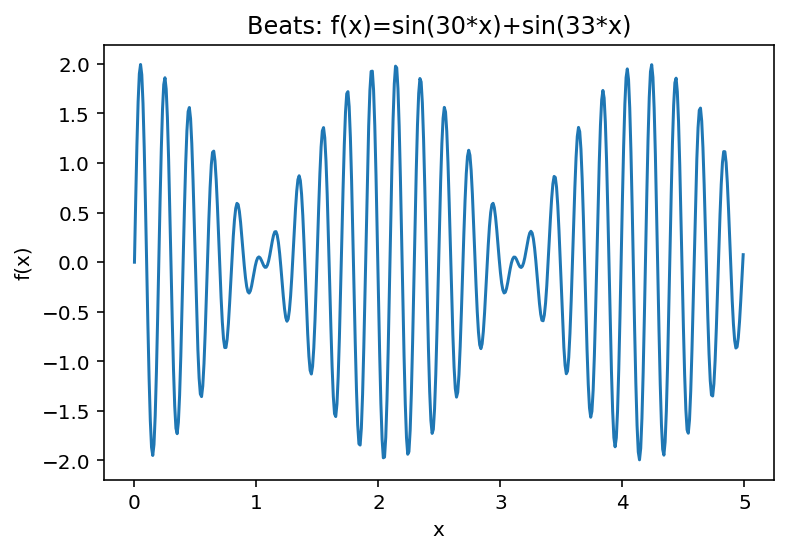

In [25]:
# Using pure python to make a list from 0 to 5 with 100 points
x = [v/100 for v in range(500)]

# Now compute the function, again with a list comprehension
y = [math.sin(30*v) + math.sin(33*v) for v in x]

plt.figure()
plt.plot(x,y)
plt.title('Beats: f(x)=sin(30*x)+sin(33*x)')
plt.xlabel('x')
plt.ylabel('f(x)');

* When we go into plotting, we'll see a "better" way to plot
* Later we'll use numpy here instead of Python's lists and math library

---
> Reminder! list comprehensions and looping in Python is **slow**. We will soon see how to do this more cleanly and beautifuly in numpy, and it will be faster too.

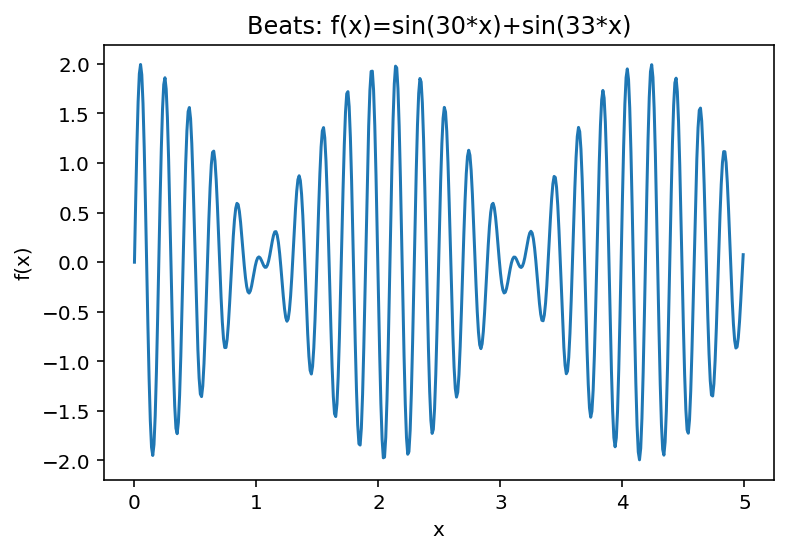

In [26]:
class Wave:
    def __init__(self, x, coef):
        self.x = x
        self.y = [math.sin(coef*v) for v in x]
    
    def __add__(self, other):
        result = self.__class__(self.x, 0)
        result.y = [a+b for a,b in zip(self.x, other.x)]
        return result

    def plot(self):
        plt.plot(x,y)
        plt.xlabel('x')
        plt.ylabel('f(x)');
        
# Using pure python to make a list from 0 to 5 with 100 points
x = [v/100 for v in range(500)]

# Now compute the function
wave = Wave(x, 30) + Wave(x, 33)

plt.figure()
wave.plot()
plt.title('Beats: f(x)=sin(30*x)+sin(33*x)');

### Bonus: Using Numpy notation

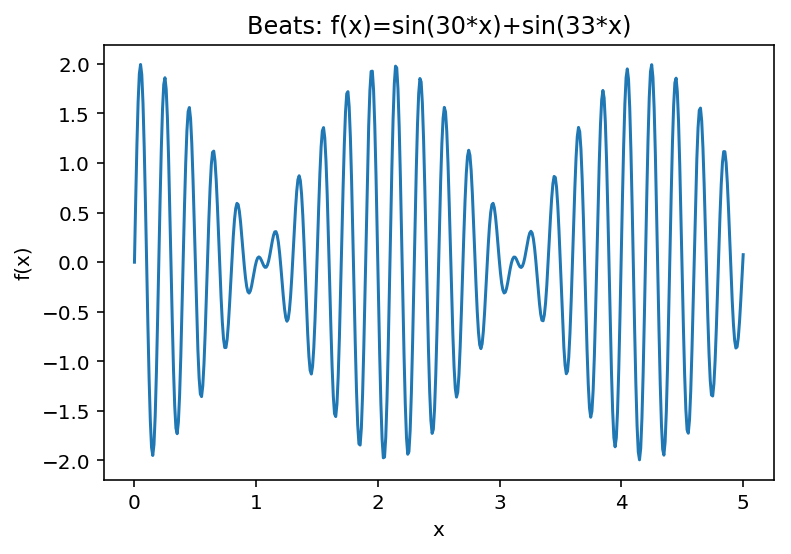

In [29]:
import numpy as np

class Wave:
    def __init__(self, x, coef):
        self.x = x
        self.y = np.sin(coef*x)
    
    def __add__(self, other):
        result = self.__class__(self.x, 0)
        result.y = self.y + other.y
        return result

    def plot(self):
        plt.plot(x,y)
        plt.xlabel('x')
        plt.ylabel('f(x)');
        
# Using numpy to make an array from 0 to 5 with 100 points
x = np.linspace(0,5,500)

# Now compute the function
wave = Wave(x, 30) + Wave(x, 33)

plt.figure()
wave.plot()
plt.title('Beats: f(x)=sin(30*x)+sin(33*x)');